In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Concept And Technologies of AI/student (1).csv')
df.head()

,Math,Reading,Writing
0,48,68,63
1,62,81,72
2,79,80,78
3,76,83,79
4,59,64,62


In [3]:
X = df.drop('Writing', axis=1)
y = df['Writing']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [7]:
print("=== Baseline Linear Regression ===")
print("Coefficients:", lin_reg.coef_)
print("Intercept:", lin_reg.intercept_)

=== Baseline Linear Regression ===
Coefficients: [0.09212476 0.91363985]
Intercept: -1.538927419707349


In [8]:
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

In [9]:
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test  MSE:", mean_squared_error(y_test, y_test_pred))

Train MSE: 20.42671379648373
Test  MSE: 22.92523648341902


In [10]:
alpha_grid = {"alpha": np.logspace(-3, 0, 13)}  # 0.001 … 1

In [11]:
ridge = Ridge(random_state=42)
lasso = Lasso(random_state=42, max_iter=10000)

In [12]:
ridge_cv = GridSearchCV(
    ridge, alpha_grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1
)
lasso_cv = GridSearchCV(
    lasso, alpha_grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1
)

In [13]:
ridge_cv.fit(X_train, y_train)
lasso_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(max_iter=10000, random_state=42), n_jobs=-1,
             param_grid={'alpha': array([0.001     , 0.00177828, 0.00316228, 0.00562341, 0.01      ,
       0.01778279, 0.03162278, 0.05623413, 0.1       , 0.17782794,
       0.31622777, 0.56234133, 1.        ])},
             scoring='neg_mean_squared_error')

In [14]:
print("\n=== Hyperparameter Tuning Results ===")
print("Best Ridge alpha:", ridge_cv.best_params_["alpha"])
print("Best Ridge CV MSE:", -ridge_cv.best_score_)
print("Best Lasso alpha:", lasso_cv.best_params_["alpha"])
print("Best Lasso CV MSE:", -lasso_cv.best_score_)


=== Hyperparameter Tuning Results ===
Best Ridge alpha: 1.0
Best Ridge CV MSE: 20.521736849527862
Best Lasso alpha: 0.005623413251903491
Best Lasso CV MSE: 20.521654529872755


In [15]:
best_ridge = ridge_cv.best_estimator_
best_lasso = lasso_cv.best_estimator_

In [16]:
ridge_train_pred = best_ridge.predict(X_train)
ridge_test_pred = best_ridge.predict(X_test)
lasso_train_pred = best_lasso.predict(X_train)
lasso_test_pred = best_lasso.predict(X_test)

In [17]:
print("\n=== Ridge (L2) with best alpha ===")
print("Coefficients:", best_ridge.coef_)
print("Train MSE:", mean_squared_error(y_train, ridge_train_pred))
print("Test  MSE:", mean_squared_error(y_test, ridge_test_pred))


=== Ridge (L2) with best alpha ===
Coefficients: [0.09213514 0.91362602]
Train MSE: 20.426713811078994
Test  MSE: 22.925202313725666


In [18]:
print("\n=== Lasso (L1) with best alpha ===")
print("Coefficients:", best_lasso.coef_)
print("Train MSE:", mean_squared_error(y_train, lasso_train_pred))
print("Test  MSE:", mean_squared_error(y_test, lasso_test_pred))


=== Lasso (L1) with best alpha ===
Coefficients: [0.09220777 0.91354592]
Train MSE: 20.426714484075706
Test  MSE: 22.924964900912222


### 3.1 Task 1: Load and Split Dataset

### Load California Housing Dataset:

In [38]:
from sklearn.datasets import fetch_openml

In [39]:
from sklearn.model_selection import train_test_split

In [41]:
X, y = fetch_openml(data_id=44977, as_frame=False, return_X_y=True)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Step 1: Baseline Model (No Regularization) Build a Linear Regression model without any regularization.

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
from sklearn.metrics import mean_squared_error

In [45]:
lin_reg = LinearRegression()

In [46]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [47]:
print("=== Baseline Linear Regression ===")
print("Coefficients:", lin_reg.coef_)
print("Intercept:", lin_reg.intercept_)

=== Baseline Linear Regression ===
Coefficients: [-4.26323917e+04 -4.24500719e+04  1.18280965e+03 -8.18797708e+00
  1.16260128e+02 -3.84922131e+01  4.63425720e+01  4.05384044e+04]
Intercept: -3578224.234818384


In [48]:
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

In [49]:
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Test  MSE:", mean_squared_error(y_test, y_test_pred))

Train MSE: 4811134397.884198
Test  MSE: 4918556441.47778


#### Step 2: Hyperparameter Tuning Use GridSearchCV or RandomizedSearchCV to tune hyperparameters for Ridge and Lasso regression models.

In [50]:
from sklearn.linear_model import Ridge, Lasso

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
alpha_grid = {"alpha": np.logspace(-3, 0, 13)}

In [53]:
ridge = Ridge(random_state=42)

In [54]:
lasso = Lasso(random_state=42, max_iter=10000)

In [55]:
ridge_cv = GridSearchCV(ridge, alpha_grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)

In [56]:
lasso_cv = GridSearchCV(lasso, alpha_grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)

In [57]:
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([0.001     , 0.00177828, 0.00316228, 0.00562341, 0.01      ,
       0.01778279, 0.03162278, 0.05623413, 0.1       , 0.17782794,
       0.31622777, 0.56234133, 1.        ])},
             scoring='neg_mean_squared_error')

In [58]:
lasso_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(max_iter=10000, random_state=42), n_jobs=-1,
             param_grid={'alpha': array([0.001     , 0.00177828, 0.00316228, 0.00562341, 0.01      ,
       0.01778279, 0.03162278, 0.05623413, 0.1       , 0.17782794,
       0.31622777, 0.56234133, 1.        ])},
             scoring='neg_mean_squared_error')

In [59]:
print("=== Hyperparameter Tuning Results ===")
print("Best Ridge alpha:", ridge_cv.best_params_["alpha"])
print("Best Ridge CV MSE:", -ridge_cv.best_score_)
print("Best Lasso alpha:", lasso_cv.best_params_["alpha"])
print("Best Lasso CV MSE:", -lasso_cv.best_score_)

=== Hyperparameter Tuning Results ===
Best Ridge alpha: 1.0
Best Ridge CV MSE: 4837033105.965662
Best Lasso alpha: 1.0
Best Lasso CV MSE: 4837034276.761754


In [60]:
best_ridge = ridge_cv.best_estimator_
best_lasso = lasso_cv.best_estimator_

In [61]:
ridge_train_pred = best_ridge.predict(X_train)
ridge_test_pred = best_ridge.predict(X_test)
lasso_train_pred = best_lasso.predict(X_train)
lasso_test_pred = best_lasso.predict(X_test)

In [62]:
print("\n=== Ridge (L2) with best alpha ===")
print("Coefficients:", best_ridge.coef_)
print("Train MSE:", mean_squared_error(y_train, ridge_train_pred))
print("Test  MSE:", mean_squared_error(y_test, ridge_test_pred))


=== Ridge (L2) with best alpha ===
Coefficients: [-4.26226944e+04 -4.24410116e+04  1.18296423e+03 -8.18887824e+00
  1.16246555e+02 -3.84926063e+01  4.63652583e+01  4.05389240e+04]
Train MSE: 4811134444.917007
Test  MSE: 4918557129.791423


In [63]:
print("\n=== Lasso (L1) with best alpha ===")
print("Coefficients:", best_lasso.coef_)
print("Train MSE:", mean_squared_error(y_train, lasso_train_pred))
print("Test  MSE:", mean_squared_error(y_test, lasso_test_pred))


=== Lasso (L1) with best alpha ===
Coefficients: [-4.26286808e+04 -4.24466049e+04  1.18286158e+03 -8.18829122e+00
  1.16254615e+02 -3.84923721e+01  4.63513818e+01  4.05385728e+04]
Train MSE: 4811134404.837947
Test  MSE: 4918556294.173767


#### Step 3: Regularization Experiments (L1 vs L2) Train L1 (Lasso) and L2 (Ridge) regression models using the optimal hyperparameters.

In [64]:
best_ridge.fit(X_train, y_train)

Ridge(alpha=np.float64(1.0), random_state=42)

In [65]:
best_lasso.fit(X_train, y_train)

Lasso(alpha=np.float64(1.0), max_iter=10000, random_state=42)

In [66]:
ridge_train_pred = best_ridge.predict(X_train)
ridge_test_pred = best_ridge.predict(X_test)

In [67]:
lasso_train_pred = best_lasso.predict(X_train)
lasso_test_pred = best_lasso.predict(X_test)

In [68]:
print("=== Ridge (L2) Regression ===")
print("Coefficients:", best_ridge.coef_)
print("Train MSE:", mean_squared_error(y_train, ridge_train_pred))
print("Test  MSE:", mean_squared_error(y_test, ridge_test_pred))

=== Ridge (L2) Regression ===
Coefficients: [-4.26226944e+04 -4.24410116e+04  1.18296423e+03 -8.18887824e+00
  1.16246555e+02 -3.84926063e+01  4.63652583e+01  4.05389240e+04]
Train MSE: 4811134444.917007
Test  MSE: 4918557129.791423


In [69]:
print("\n=== Lasso (L1) Regression ===")
print("Coefficients:", best_lasso.coef_)
print("Train MSE:", mean_squared_error(y_train, lasso_train_pred))
print("Test  MSE:", mean_squared_error(y_test, lasso_test_pred))


=== Lasso (L1) Regression ===
Coefficients: [-4.26286808e+04 -4.24466049e+04  1.18286158e+03 -8.18829122e+00
  1.16254615e+02 -3.84923721e+01  4.63513818e+01  4.05385728e+04]
Train MSE: 4811134404.837947
Test  MSE: 4918556294.173767


In [70]:
import matplotlib.pyplot as plt
import numpy as np

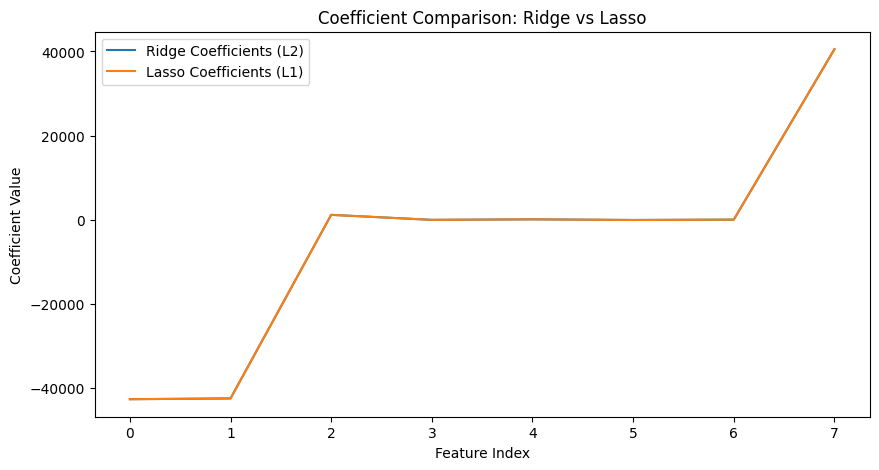

In [71]:
plt.figure(figsize=(10,5))
plt.plot(best_ridge.coef_, label="Ridge Coefficients (L2)")
plt.plot(best_lasso.coef_, label="Lasso Coefficients (L1)")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Coefficient Comparison: Ridge vs Lasso")
plt.legend()
plt.show()

### Part 2: Classification Task (Breast Cancer)

### Task 1: Load and Split Dataset

#### Load Breast Cancer Dataset for Classification:

In [73]:
from sklearn.datasets import load_breast_cancer

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X, y = load_breast_cancer(return_X_y=True)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Step 1: Baseline Model (No Regularization) Build a Logistic Regression model without specifying any regularization (default settings)

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
from sklearn.metrics import accuracy_score

In [79]:
log_reg = LogisticRegression(max_iter=10000)

In [80]:
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [81]:
print("=== Baseline Logistic Regression ===")
print("Coefficients:", log_reg.coef_)
print("Intercept:", log_reg.intercept_)

=== Baseline Logistic Regression ===
Coefficients: [[ 1.0274368   0.22145051 -0.36213488  0.0254667  -0.15623532 -0.23771256
  -0.53255786 -0.28369224 -0.22668189 -0.03649446 -0.09710208  1.3705667
  -0.18140942 -0.08719575 -0.02245523  0.04736092 -0.04294784 -0.03240188
  -0.03473732  0.01160522  0.11165329 -0.50887722 -0.01555395 -0.016857
  -0.30773117 -0.77270908 -1.42859535 -0.51092923 -0.74689363 -0.10094404]]
Intercept: [28.64871395]


In [82]:
y_train_pred = log_reg.predict(X_train)

In [83]:
y_test_pred = log_reg.predict(X_test)

In [84]:
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test  Accuracy:", accuracy_score(y_test, y_test_pred))

Train Accuracy: 0.9582417582417583
Test  Accuracy: 0.956140350877193


#### Step 2: Hyperparameter Tuning Use GridSearchCV or RandomizedSearchCV to tune hyperparameters for logistic regression models with regularization.

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
param_grid = {
    "C": np.logspace(-3, 3, 7),
    "penalty": ["l1", "l2"],
    "solver": ["liblinear"]
}

In [90]:
log_reg = LogisticRegression(max_iter=10000, random_state=42)

In [91]:
log_reg_cv = GridSearchCV(log_reg, param_grid, cv=5, scoring="accuracy", n_jobs=-1)

In [93]:
log_reg_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, random_state=42),
             n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy')

In [94]:
print("=== Hyperparameter Tuning Results ===")
print("Best Parameters:", log_reg_cv.best_params_)
print("Best CV Accuracy:", log_reg_cv.best_score_)

=== Hyperparameter Tuning Results ===
Best Parameters: {'C': np.float64(100.0), 'penalty': 'l1', 'solver': 'liblinear'}
Best CV Accuracy: 0.9670329670329672


In [95]:
best_log_reg = log_reg_cv.best_estimator_

In [96]:
y_train_pred = best_log_reg.predict(X_train)

In [97]:
y_test_pred = best_log_reg.predict(X_test)

In [98]:
print("\n=== Logistic Regression with Best Hyperparameters ===")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test  Accuracy:", accuracy_score(y_test, y_test_pred))


=== Logistic Regression with Best Hyperparameters ===
Train Accuracy: 0.989010989010989
Test  Accuracy: 0.9824561403508771


#### Step 3: Regularization Experiments (L1 vs L2) Train separate logistic regression models using L1 (Lasso-like) and L2 (Ridge-like) regularization with the optimal hyperparameters.

In [105]:
log_reg_l1 = LogisticRegression(C=best_log_reg.C, penalty='l1', solver='liblinear', max_iter=10000)

In [106]:
log_reg_l2 = LogisticRegression(C=best_log_reg.C, penalty='l2', solver='liblinear', max_iter=10000)

In [107]:
log_reg_l1.fit(X_train, y_train)

LogisticRegression(C=np.float64(100.0), max_iter=10000, penalty='l1',
                   solver='liblinear')

In [108]:
log_reg_l2.fit(X_train, y_train)

LogisticRegression(C=np.float64(100.0), max_iter=10000, solver='liblinear')

In [109]:
y_train_pred_l1 = log_reg_l1.predict(X_train)

In [110]:
y_test_pred_l1 = log_reg_l1.predict(X_test)

In [111]:
y_train_pred_l2 = log_reg_l2.predict(X_train)

In [112]:
y_test_pred_l2 = log_reg_l2.predict(X_test)

In [113]:
print("=== Logistic Regression with L1 Regularization ===")
print("Coefficients:", log_reg_l1.coef_)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_l1))
print("Test  Accuracy:", accuracy_score(y_test, y_test_pred_l1))

=== Logistic Regression with L1 Regularization ===
Coefficients: [[ 7.27606808e-01 -1.07758429e-01  9.70435965e-02 -2.01477565e-03
   0.00000000e+00  4.72073947e+01 -1.15959841e+01 -1.36264097e+02
   1.97921413e+01  0.00000000e+00  0.00000000e+00  1.72830921e+00
   0.00000000e+00 -1.97691193e-01  0.00000000e+00  0.00000000e+00
   4.99122628e+01  0.00000000e+00  1.86232878e+01  0.00000000e+00
   2.32090519e-01 -4.39007916e-01  5.48520735e-02 -2.11109740e-02
  -2.17475479e+01  8.04356115e+00 -1.46698357e+01 -2.52519160e+01
  -2.53600743e+01  0.00000000e+00]]
Train Accuracy: 0.989010989010989
Test  Accuracy: 0.9824561403508771


In [114]:
print("\n=== Logistic Regression with L2 Regularization ===")
print("Coefficients:", log_reg_l2.coef_)
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_l2))
print("Test  Accuracy:", accuracy_score(y_test, y_test_pred_l2))


=== Logistic Regression with L2 Regularization ===
Coefficients: [[ 5.40272741  0.26573732 -0.52651203 -0.02095479 -2.29922151 -0.2169419
  -3.56980218 -5.0110607  -2.26418385  0.36762747 -0.58036525  3.84169255
  -0.63875637 -0.10714305 -0.40591246  3.57237002  4.36577514 -0.26636925
   0.39354765  0.62630698 -0.20718582 -0.68999884  0.17661962 -0.01813087
  -4.67716843 -0.0140846  -4.46493229 -7.61271125 -6.83571871  0.57463274]]
Train Accuracy: 0.9692307692307692
Test  Accuracy: 0.956140350877193
